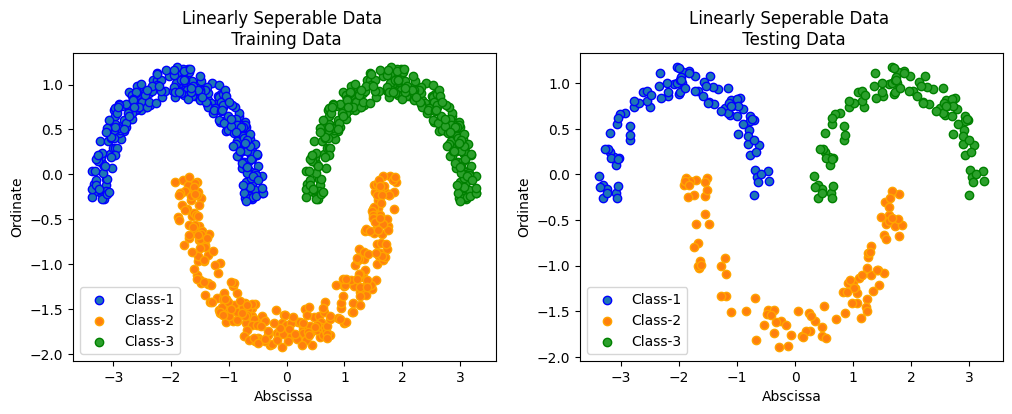

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Load the data from the text file
data=np.loadtxt(r"C:\Users\Asus\Documents\Python Codes\Assignments\Deep Learning\Data\Classification\NLS_Group12.txt", dtype=float)

# Split the data into training,Validation & testing sets
# np.random.seed(42)
# np.random.shuffle(data)

data1= data[:500, :]
data2= data[500:1000, :]
data3= data[1000:, :]

train1 = data1[:300]
train2 = data2[:300]
train3 = data3[:300]
train=np.concatenate([train1,train2,train3])

test1 = data1[300:400]
test2 = data2[300:400]
test3 = data3[300:400]
test=np.concatenate([test1,test2,test3])

validation1 = data1[400:500]
validation2 = data2[400:500]
validation3 = data3[400:500]

fig,axis=plt.subplots(1,2,figsize=(12,4))
axis[0].scatter(train1[:, 0], train1[:, 1],label='Class-1',edgecolors="blue")
axis[0].scatter(train2[:, 0], train2[:, 1],label='Class-2',edgecolors="orange")
axis[0].scatter(train3[:, 0], train3[:, 1],label='Class-3',edgecolors="green")
axis[0].set_xlabel("Abscissa")
axis[0].set_ylabel("Ordinate")
axis[0].set_title("Linearly Seperable Data \n Training Data")
axis[0].legend()
axis[1].scatter(test1[:, 0], test1[:, 1],label='Class-1',edgecolors="blue")
axis[1].scatter(test2[:, 0], test2[:, 1],label='Class-2',edgecolors="orange")
axis[1].scatter(test3[:, 0], test3[:, 1],label='Class-3',edgecolors="green")
axis[1].set_xlabel("Abscissa")
axis[1].set_ylabel("Ordinate")
axis[1].set_title("Linearly Seperable Data \n Testing Data")
axis[1].legend()
# print(train)

In [47]:
def Leaky_Relu(x):
    if x>=0:
        return x
    else:
        return 0.01*x

def Relu(x):
    return max(0,x)

def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def Update_Weight(Weight,N_In,N_Out,Yn):
    Learning_Rate=0.03
    Delta_W = Learning_Rate*np.outer(N_In,N_Out*(1-N_Out)*(Yn-N_Out))
    # Weight=np.add(Weight,Delta_W,out=Weight, casting='unsafe')
    Weight=Weight+Delta_W
    return Weight


#Assuming 1 hidden layers,Generalize it afterwards
def Perceptron(Data,Epoch):
         
    # W_o=np.array([[1,1,1],[1,1,1],[1,1,1],[1,1,1],[1,1,1]])    # 3 Neurons in Output Layer
    # W_h=np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])        # 5 Neurons in Hidden Layer
    
    np.random.seed(42)
    W_h1=np.random.randn(3,50)
    W_h2=np.random.randn(50,50)
    W_o=np.random.randn(50,3)

    Errors=np.array([])
    Avg_Errors=np.array([])
    while(Epoch):
        H1=[]
        H2=[]
        for i in range(len(Data)):
            # In_H1=np.concatenate([1],Data[i,:], axis=0) #Inputs to Input Layer
            In_H1=[1,Data[i,0],Data[i,1]] #Inputs to Input Layer
            Out_H1=Sigmoid(np.dot(In_H1,W_h1)) # Output of 1st Hidden Layer
            H1.append(Out_H1)
            Out_H2=Sigmoid(np.dot(Out_H1,W_h2)) # Output of 2nd Hidden Layer
            H2.append(Out_H2)
            Y_pred=Sigmoid(np.dot(Out_H2,W_o)) #Output of FCNN
            
            Class1,Class2,Class3 = 0,0,0
            
            if i<300:
                Class1=1      # Belongs to Class-1
            elif i>=300 and i<600:
                Class2=1      # Belongs to Class-2
            else:
                Class3=1      # Belongs to Class-3

            Y_GT=[Class1,Class2,Class3]
            Error=sum(0.5*(Y_GT-Y_pred)**2)
            Errors=np.append(Errors,Error)
            #Weight Updation
            # W_o=Update_Weight(W_o,Out_H1,Y_pred,Y_GT)
            # # W_h=Update_Weight(W_h,In_H1,Y_pred,Y_GT)
            # A=(np.dot(W_o,(Y_GT-Y_pred)*Y_pred*(1-Y_pred)))
            # B=Out_H1*(1-Out_H1)
            # W_h =np.add(W_h,0.03*np.outer(In_H1,A*B), out=W_h, casting='unsafe') 
            W_o=Update_Weight(W_o,Out_H2,Y_pred,Y_GT)
            # W_h=Update_Weight(W_h,In_H1,Y_pred,Y_GT)
            A=(np.dot(W_o,(Y_GT-Y_pred)*Y_pred*(1-Y_pred)))
            B=Out_H2*(1-Out_H2)
            W_h2 =np.add(W_h2,0.03*np.outer(Out_H1,A*B), out=W_h2, casting='unsafe')
            C=A*B
            D=np.dot(W_h2,C)
            W_h1=np.add(W_h1,0.03*np.outer(In_H1,Out_H1*(1-Out_H1)*D), out=W_h1, casting='unsafe')
        Epoch-=1
        Avg_Error=np.mean(Errors)
        Avg_Errors=np.append(Avg_Errors,Avg_Error)

    return W_o,W_h1,W_h2,Avg_Errors,H1,H2

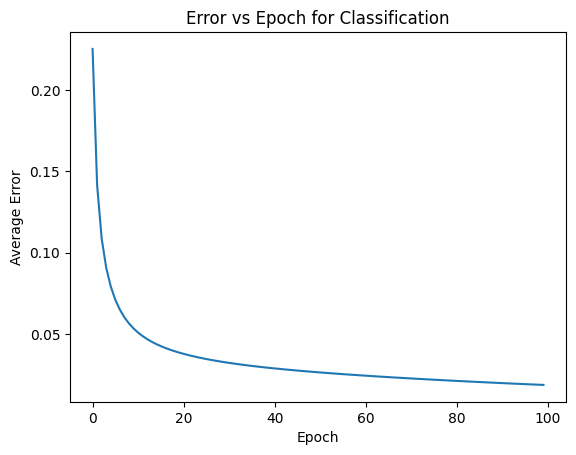

In [48]:
W_o,W_h1,W_h2,Avg_Errors,H1,H2 = Perceptron(train,100)

plt.plot(Avg_Errors)
plt.title("Error vs Epoch for Classification")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.show()


In [14]:
def FCNN_Test(Data,W_h1,W_h2,W_o):
    Predictions=[]
    for i in range(len(Data)):
        Out_H1=Sigmoid(np.dot([1,Data[i,0],Data[i,1]],W_h1)) # Ouput of 1st Hidden Layer
        Out_H2=Sigmoid(np.dot(Out_H1,W_h2))                  # Output of 2nd Hidden Layer       
        Out_FCNN=Sigmoid(np.dot(Out_H2,W_o))                # Output of FCNN
        
        Predictions.append(np.argmax(np.array(Out_FCNN))+1)
        GT=np.array([1]*100 + [2]*100 + [3]*100)
        
    return np.array(Predictions),GT

Predictions,GT=FCNN_Test(test,W_h1,W_h2,W_o)
# print(Predictions)


In [15]:
# max(data[:,0])

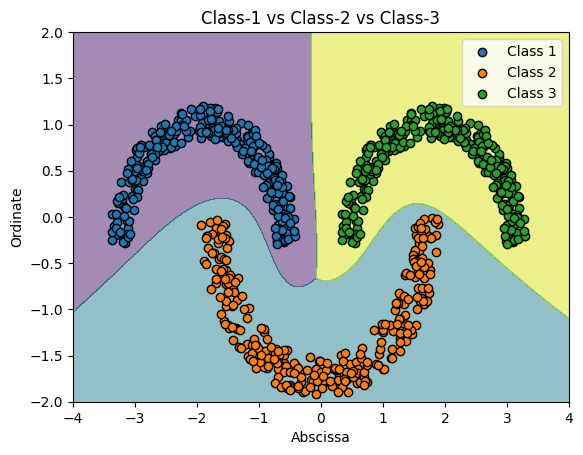

In [16]:
def classifier(Data,W_h1,W_h2,W_o):
    Out_H1=Sigmoid(np.dot([1,Data[0],Data[1]],W_h1))      # Ouput of 1st Hidden Layer
    Out_H2=Sigmoid(np.dot(Out_H1,W_h2))                  # Output of 2nd Hidden Layer       
    Out_FCNN=Sigmoid(np.dot(Out_H2,W_o))                 # Output of FCNN
    return np.argmax(np.array(Out_FCNN))+1

x_arr = np.linspace(-4, 4, 1000)
y_arr = np.linspace(-2, 2, 1000)
xx, yy = np.meshgrid(x_arr, y_arr)
region = np.concatenate((xx.reshape((-1,1)), yy.reshape((-1,1))), axis=1)
# print(region.shape)

Class_Predictions = []
for point in region:
    Class_Predictions.append(classifier(point,W_h1,W_h2,W_o))

Class_Predictions = np.reshape(Class_Predictions, xx.shape)
plt.figure()
plt.contourf(xx, yy, Class_Predictions, alpha = 0.5)
plt.scatter(train1[:, 0],train1[:, 1], label='Class 1', edgecolors='black')
plt.scatter(train2[:, 0],train2[:, 1], label='Class 2', edgecolors='black')
plt.scatter(train3[:, 0],train3[:, 1], label='Class 3', edgecolors='black')
plt.xlabel("Abscissa")
plt.ylabel("Ordinate")
plt.title("Class-1 vs Class-2 vs Class-3")
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,f1_score

CM = confusion_matrix(GT,Predictions)
Accuracy= accuracy_score(GT,Predictions)
print("Confusion Matrix \n",CM)
print(f'\nAccuracy : {Accuracy*100}%')

print(len(FCNN_Test(test,W_h1,W_h2,W_o)))
FCNN_Test(test,W_h1,W_h2,W_o)
print(GT.shape)
print(Predictions.shape)

Confusion Matrix 
 [[100   0   0]
 [  0 100   0]
 [  0   0 100]]

Accuracy : 100.0%
2
(300,)
(300,)


In [45]:
# print(H1[:,0])



In [46]:
# H1=np.array(H1)
# print(H1[:,0])


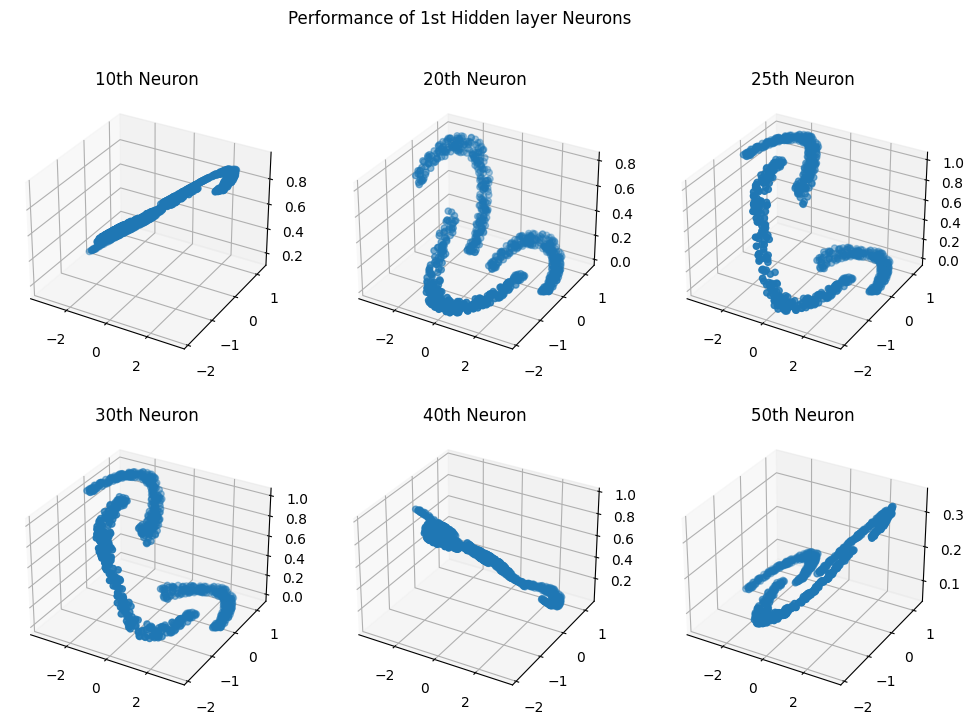

In [52]:
H1=np.array(H1)

plt.figure(figsize=(12, 8))
plt.suptitle("Performance of 1st Hidden layer Neurons")
ax = plt.subplot(2, 3, 1, projection='3d')
ax.scatter(train[:,0], train[:,1],H1[:,9])
ax.set_title("10th Neuron")

ax = plt.subplot(2, 3, 2,projection='3d')
ax.scatter(train[:,0], train[:,1],H1[:,19])
ax.set_title("20th Neuron")

ax = plt.subplot(2, 3, 3,projection='3d')
ax.scatter(train[:,0], train[:,1],H1[:,24])
ax.set_title("25th Neuron")

ax = plt.subplot(2, 3, 4,projection='3d')
ax.scatter(train[:,0], train[:,1],H1[:,29])
ax.set_title("30th Neuron")

ax = plt.subplot(2, 3, 5,projection='3d')
ax.scatter(train[:,0], train[:,1],H1[:,39])
ax.set_title("40th Neuron")

ax = plt.subplot(2, 3, 6,projection='3d')
ax.scatter(train[:,0], train[:,1],H1[:,49])
ax.set_title("50th Neuron")
plt.show()

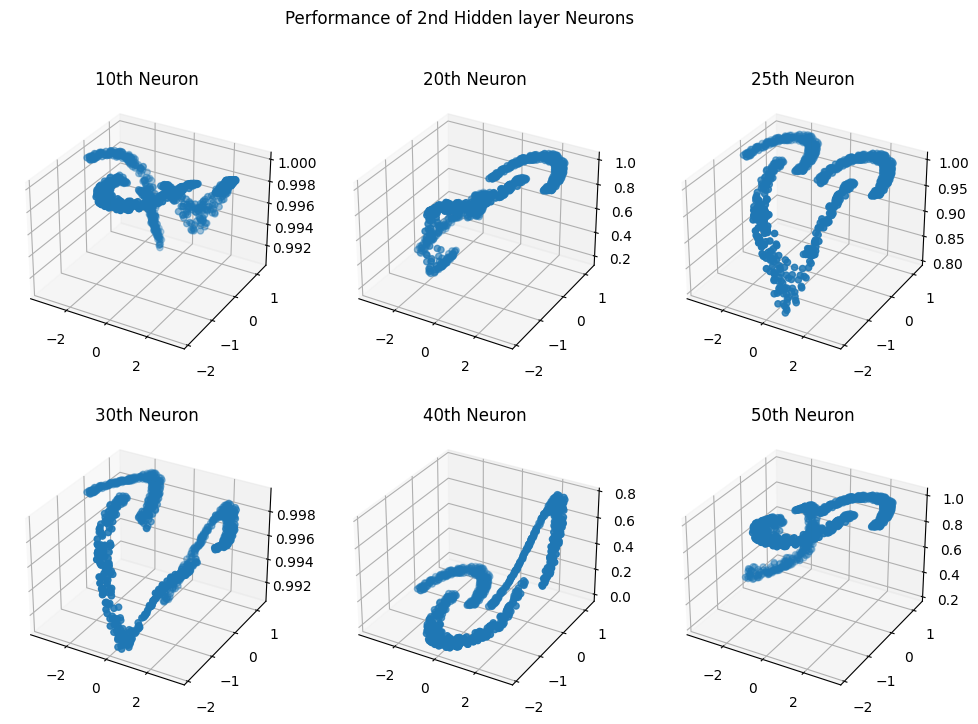

In [51]:
H2=np.array(H2)

plt.figure(figsize=(12, 8))
plt.suptitle("Performance of 2nd Hidden layer Neurons")
ax = plt.subplot(2, 3, 1, projection='3d')
ax.scatter(train[:,0], train[:,1],H2[:,9])
ax.set_title("10th Neuron")

ax = plt.subplot(2, 3, 2,projection='3d')
ax.scatter(train[:,0], train[:,1],H2[:,19])
ax.set_title("20th Neuron")

ax = plt.subplot(2, 3, 3,projection='3d')
ax.scatter(train[:,0], train[:,1],H2[:,24])
ax.set_title("25th Neuron")

ax = plt.subplot(2, 3, 4,projection='3d')
ax.scatter(train[:,0], train[:,1],H2[:,29])
ax.set_title("30th Neuron")

ax = plt.subplot(2, 3, 5,projection='3d')
ax.scatter(train[:,0], train[:,1],H2[:,39])
ax.set_title("40th Neuron")

ax = plt.subplot(2, 3, 6,projection='3d')
ax.scatter(train[:,0], train[:,1],H2[:,49])
ax.set_title("50th Neuron")
plt.show()